<a href="https://colab.research.google.com/github/LeuroPrince/Literature-Reproduction-for-WenLab/blob/main/Reproduction_of_figure2E%262F_for_WenLab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
fig2E_file_path = '/content/drive/My Drive/WenLab/Figure 2-source data for Figure 2E-F.xlsx'
df_fig2E = pd.read_excel(fig2E_file_path,sheet_name='qw373+Pnpr-9-twk-18',header = 2)
df_fig2E.head()

,worm name,turn?,duration time (s),date,note
0,20191030w1,1.0,2.771,20180723.0,NaN
1,NaN,1.0,3.619,NaN,NaN
2,NaN,1.0,4.421,NaN,NaN
3,NaN,1.0,2.739,NaN,NaN
4,NaN,1.0,4.769,NaN,NaN


/tmp/ipython-input-3826413829.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_fig2E['duration'].fillna(0, inplace=True)


步骤 2/4: Figure 2E 数据准备成功 (已更新 Pause 条件)。
  Total trials: 332
  Type I (no turn): 91
  Type II (with turn): 126
  No response: 70
  Pause (note=='slow'): 35


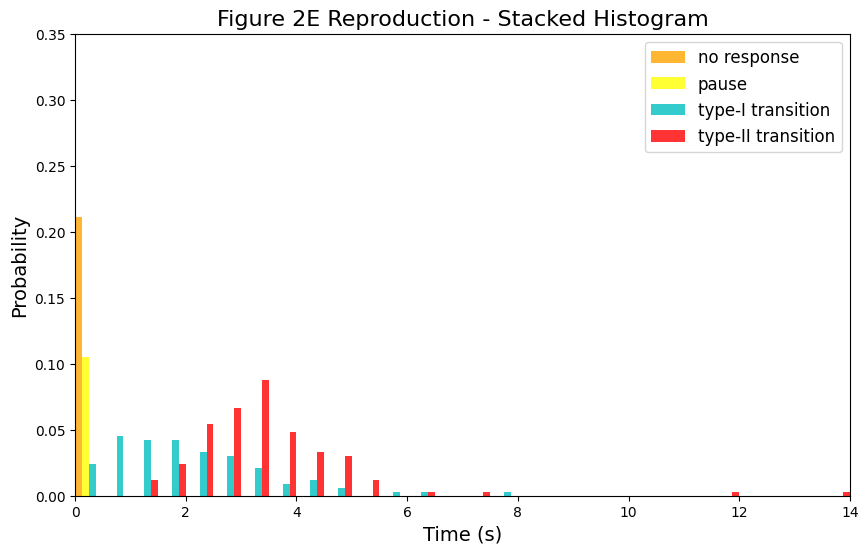

In [5]:
###figure2E
df_fig2E = df_fig2E.rename(columns={'duration time (s)': 'duration'})
df_fig2E['duration'].fillna(0, inplace=True)
total_trials_2E = len(df_fig2E)
reversal_without_turn_2e = df_fig2E[df_fig2E['turn?'] == 0]['duration']
reversal_with_turn_2e = df_fig2E[df_fig2E['turn?'] == 1]['duration']
pause_mask = (df_fig2E['duration'] == 0) & (df_fig2E['note'].str.strip() == 'stop')
pause_2e = df_fig2E[pause_mask]['duration']
no_response_mask = (df_fig2E['duration'] == 0) & (df_fig2E['note'].str.strip() != 'stop')
no_response_2e = df_fig2E[no_response_mask]['duration']
print("步骤 2/4: Figure 2E 数据准备成功 (已更新 Pause 条件)。")
print(f"  Total trials: {total_trials_2E}")
print(f"  Type I (no turn): {len(reversal_without_turn_2e)}")
print(f"  Type II (with turn): {len(reversal_with_turn_2e)}")
print(f"  No response: {len(no_response_2e)}") # 应为 70
print(f"  Pause (note=='slow'): {len(pause_2e)}") # 应为 35


##绘制直方图
bins_hist_2e = np.arange(0, 15, 0.5)

# 计算全局权重
weights_without_2e = np.ones_like(reversal_without_turn_2e) / total_trials_2E
weights_with_2e = np.ones_like(reversal_with_turn_2e) / total_trials_2E
weights_no_2e = np.ones_like(no_response_2e) / total_trials_2E
weights_pause_2e = np.ones_like(pause_2e) / total_trials_2E

plt.figure(figsize=(10, 6))

# 定义数据、权重、颜色和标签列表 (将 no response 和 pause 放在底部)
data_list_2e = [no_response_2e, pause_2e, reversal_without_turn_2e, reversal_with_turn_2e]
weights_list_2e = [weights_no_2e, weights_pause_2e, weights_without_2e, weights_with_2e]
# 对应图例颜色：橙色、黄色、青色、红色
color_list_2e = ['orange', 'yellow', 'c', 'r']
label_list_2e = ['no response', 'pause', 'type-I transition', 'type-II transition']

# 绘制堆叠直方图
plt.hist(
    data_list_2e,
    bins=bins_hist_2e,
    weights=weights_list_2e,
    label=label_list_2e,
    color=color_list_2e,
    alpha = 0.8,
    rwidth = 4,
    linewidth=1,

)

# 4. 美化直方图
plt.xlabel('Time (s)', fontsize=14)
plt.ylabel('Probability', fontsize=14)
plt.legend(loc='upper right', fontsize=12)
plt.title('Figure 2E Reproduction - Stacked Histogram', fontsize=16)
# Y 轴范围与论文一致
plt.ylim(0, 0.35)
# X 轴范围与论文一致
plt.xlim(0, 14)
plt.grid(False)
plt.show()

/tmp/ipython-input-3628908399.py:63: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_fig2f['duration'].fillna(0, inplace=True)


步骤 1/5: Figure 2F 数据处理成功。


/tmp/ipython-input-3628908399.py:78: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_fig1c['duration'].fillna(0, inplace=True)


步骤 2/5: Figure 1C (Control) 数据处理成功。
步骤 3/5: r2 曲线拟合完成。
  Fig 2F r2 fit params: [1.400e-03 2.700e-03 2.000e+00 3.605e-01]
  Fig 1C r2 fit params: [0.0581 0.0661 2.     0.9265]
步骤 4/5: 正在绘制最终比较图表...


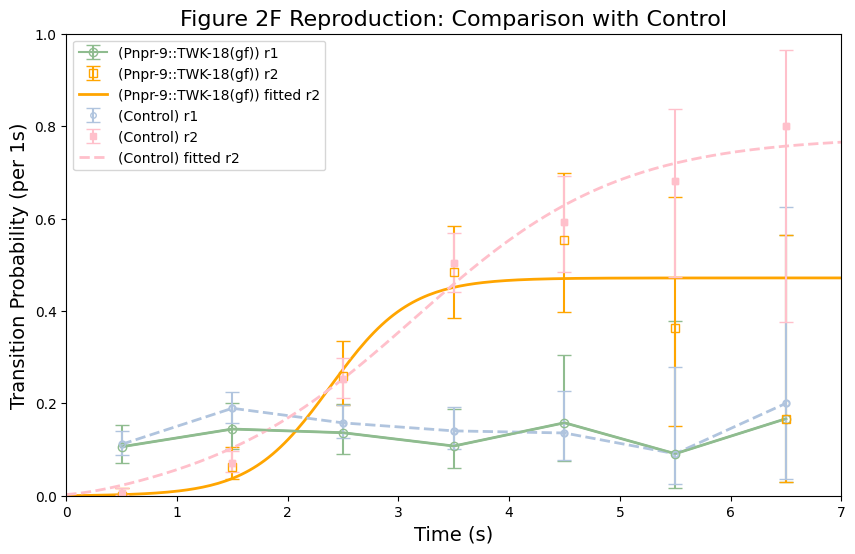

步骤 5/5: 最终比较图表绘制成功！


In [6]:

###figure2F
# 0. 导入所有需要的库
from scipy.optimize import curve_fit
from scipy.special import erfi
from statsmodels.stats.proportion import proportion_confint
import warnings

# Function to process data (calculate p_1s and CIs)
def calculate_transition_prob_1s(df, duration_col='duration', turn_col='turn?'):
    """Helper function to calculate p_1s from raw duration data using 1s bins."""
    reversal_without_turn = df[(df[turn_col] == 0) & (df[duration_col] > 0)][duration_col]
    reversal_with_turn = df[(df[turn_col] == 1) & (df[duration_col] > 0)][duration_col]

    bin_width = 1.0 # Use 1s bins
    if reversal_without_turn.empty and reversal_with_turn.empty:
        max_time_data = 7.0 # Default if no data
    elif reversal_without_turn.empty:
         max_time_data = reversal_with_turn.max()
    elif reversal_with_turn.empty:
        max_time_data = reversal_without_turn.max()
    else:
        max_time_data = max(reversal_without_turn.max(), reversal_with_turn.max())

    max_time_bins = np.ceil(max(max_time_data, 7.0)) # Ensure bins cover at least up to 7s
    bins = np.arange(0, max_time_bins + bin_width, bin_width)

    n_forw_i, _ = np.histogram(reversal_without_turn, bins=bins)
    n_turn_i, _ = np.histogram(reversal_with_turn, bins=bins)

    all_reversals = pd.concat([reversal_with_turn, reversal_without_turn])
    bin_starts = bins[:-1]
    bin_centers = bin_starts + (bin_width / 2)

    S_total_i = np.array([np.sum(all_reversals >= t_start) for t_start in bin_starts])
    S_total_i = S_total_i[:len(n_forw_i)] # Ensure length match

    p_forw_1s = np.divide(n_forw_i, S_total_i, out=np.zeros_like(n_forw_i, dtype=float), where=S_total_i!=0)
    p_turn_1s = np.divide(n_turn_i, S_total_i, out=np.zeros_like(n_turn_i, dtype=float), where=S_total_i!=0)

    ci_forw_low_1s, ci_forw_high_1s = proportion_confint(n_forw_i, S_total_i, method='wilson')
    ci_turn_low_1s, ci_turn_high_1s = proportion_confint(n_turn_i, S_total_i, method='wilson')

    # Calculate error bar magnitudes (distance from point to CI edge)
    y_err_forw_low = np.abs(p_forw_1s - ci_forw_low_1s)
    y_err_forw_high = np.abs(ci_forw_high_1s - p_forw_1s)
    y_err_turn_low = np.abs(p_turn_1s - ci_turn_low_1s)
    y_err_turn_high = np.abs(ci_turn_high_1s - p_turn_1s)

    return bin_centers, p_forw_1s, p_turn_1s, y_err_forw_low, y_err_forw_high, y_err_turn_low, y_err_turn_high, S_total_i

# Function to define r2 fit model
def r2_func_matlab(t, k1, k2, k3, k4):
    arg = k2 + k3 * np.exp(-t / k4)
    safe_arg = np.maximum(arg, 1e-9)
    return k1 / erfi(safe_arg)

# 1. Load and Process Figure 2F Data (AIB Inhibited)
try:
    file_path_fig2f = "/content/drive/My Drive/WenLab/Figure 2-source data for Figure 2E-F.xlsx"
    df_fig2f = pd.read_excel(file_path_fig2f,sheet_name = 'qw373+Pnpr-9-twk-18', header=2)
    df_fig2f.columns = df_fig2f.columns.str.strip()
    df_fig2f = df_fig2f.rename(columns={'duration time (s)': 'duration'})
    df_fig2f['duration'].fillna(0, inplace=True)

    (bin_centers_2f, p_forw_1s_2f, p_turn_1s_2f,
     y_err_r1_low_2f, y_err_r1_high_2f, y_err_r2_low_2f, y_err_r2_high_2f, S_total_i_2f) = calculate_transition_prob_1s(df_fig2f)
    print("步骤 1/5: Figure 2F 数据处理成功。")
except Exception as e:
    print(f"步骤 1/5: 处理 Figure 2F 数据失败！错误: {e}")
    raise e

# 2. Load and Process Figure 1C Data (Control)
try:
    file_path_fig1c = "/content/drive/My Drive/WenLab/Figure 1-source data for Figure 1C and supplement 1A-B.xlsx"
    df_fig1c = pd.read_excel(file_path_fig1c,sheet_name = 'Pmec-4_ChR2', header=2)
    df_fig1c.columns = df_fig1c.columns.str.strip()
    df_fig1c = df_fig1c.rename(columns={'duration of reversal(s)': 'duration'})
    df_fig1c['duration'].fillna(0, inplace=True)

    # Use the same processing function with 1s bins
    (bin_centers_1c, p_forw_1s_1c, p_turn_1s_1c,
    y_err_r1_low_1c, y_err_r1_high_1c, y_err_r2_low_1c, y_err_r2_high_1c, S_total_i_1c) = calculate_transition_prob_1s(df_fig1c) # Need S_total_i_1c for fitting
    print("步骤 2/5: Figure 1C (Control) 数据处理成功。")
except Exception as e:
    print(f"步骤 2/5: 处理 Figure 1C (Control) 数据失败！错误: {e}")
    raise e

# 3. Fit r2 Curves for BOTH datasets
fit_r2_success_2f = False
fit_r2_success_1c = False
try:
    # Fit r2 for Fig 2F
    k0_r2_2f = [0.0233, 0.1746, 0.7092, 0.2889]
    bounds_r2_2f = ([0, 0, 0, 0.1], [1.0, 2.0, 2.0, 5.0])
    num_points_r2_2f = 6
    xdata_r2_2f = bin_centers_2f[:num_points_r2_2f]
    ydata_r2_2f = p_turn_1s_2f[:num_points_r2_2f]
    valid_indices_r2_2f = ~np.isnan(ydata_r2_2f) & (S_total_i_2f[:num_points_r2_2f] > 0)
    if np.any(valid_indices_r2_2f):
        popt_r2_2f, _ = curve_fit(r2_func_matlab, xdata_r2_2f[valid_indices_r2_2f], ydata_r2_2f[valid_indices_r2_2f],
                             p0=k0_r2_2f, bounds=bounds_r2_2f, maxfev=5000)
        fit_r2_success_2f = True

    # Fit r2 for Fig 1C (Control)
    k0_r2_1c = [0.0233, 0.1746, 0.7092, 0.2889] # Use same initial guess
    bounds_r2_1c = ([0, 0, 0, 0.1], [1.0, 2.0, 2.0, 5.0]) # Use same bounds
    num_points_r2_1c = 10 # Control data might allow more points for fitting
    xdata_r2_1c = bin_centers_1c[:num_points_r2_1c]
    ydata_r2_1c = p_turn_1s_1c[:num_points_r2_1c]
    valid_indices_r2_1c = ~np.isnan(ydata_r2_1c) & (S_total_i_1c[:num_points_r2_1c] > 0)
    if np.any(valid_indices_r2_1c):
        popt_r2_1c, _ = curve_fit(r2_func_matlab, xdata_r2_1c[valid_indices_r2_1c], ydata_r2_1c[valid_indices_r2_1c],
                             p0=k0_r2_1c, bounds=bounds_r2_1c, maxfev=5000)
        fit_r2_success_1c = True

    print("步骤 3/5: r2 曲线拟合完成。")
    if fit_r2_success_2f: print(f"  Fig 2F r2 fit params: {np.round(popt_r2_2f, 4)}")
    if fit_r2_success_1c: print(f"  Fig 1C r2 fit params: {np.round(popt_r2_1c, 4)}")

except Exception as e:
     print(f"步骤 3/5: 曲线拟合失败！错误: {e}")


# 4. Plotting
print("步骤 4/5: 正在绘制最终比较图表...")
plt.figure(figsize=(10, 6))
plot_limit = 7 # Max x-value to plot

# Plot Figure 2F Data (AIB Inhibited)
valid_plot_indices_2f = bin_centers_2f <= plot_limit
# Plot r1 data points
plt.errorbar(bin_centers_2f[valid_plot_indices_2f],
             p_forw_1s_2f[valid_plot_indices_2f],
             yerr=[y_err_r1_low_2f[valid_plot_indices_2f], y_err_r1_high_2f[valid_plot_indices_2f]],
             fmt='o-',color='darkseagreen', label='(Pnpr-9::TWK-18(gf)) r1',
             markerfacecolor='none', capsize=5)
# Connect r1 data points with dashed line
plt.plot(bin_centers_2f[valid_plot_indices_2f],
         p_forw_1s_2f[valid_plot_indices_2f],
         color='darkseagreen',linestyle ='-', label='_nolegend_',lw=2)

# Plot r2 data points
plt.errorbar(bin_centers_2f[valid_plot_indices_2f],
             p_turn_1s_2f[valid_plot_indices_2f],
             yerr=[y_err_r2_low_2f[valid_plot_indices_2f], y_err_r2_high_2f[valid_plot_indices_2f]],
             fmt='s',color='orange', label='(Pnpr-9::TWK-18(gf)) r2',
             markerfacecolor='none', capsize=5)

# Plot Figure 2F Fitted r2 Line
t_smooth = np.linspace(0, plot_limit, 200)
if fit_r2_success_2f:
    y_plot_r2_line_2f = r2_func_matlab(t_smooth, *popt_r2_2f)
    plt.plot(t_smooth, y_plot_r2_line_2f,color='orange',linestyle='-',lw=2, label='(Pnpr-9::TWK-18(gf)) fitted r2')

# Plot Figure 1C Data (Control)
valid_plot_indices_1c = bin_centers_1c <= plot_limit
# Plot Control r1 data points + dashed line
plt.plot(bin_centers_1c[valid_plot_indices_1c],
         p_forw_1s_1c[valid_plot_indices_1c],
         'o--',color='lightsteelblue', markersize=5, markerfacecolor='none', linewidth=2, label='(Control) r1')
# Plot Control r2 data points + dashed line
plt.plot(bin_centers_1c[valid_plot_indices_1c],
         p_turn_1s_1c[valid_plot_indices_1c],
         's',color='pink', markersize=5, linewidth=2, label='(Control) r2')

# Plot Figure 1C Fitted r2 Line
if fit_r2_success_1c:
    y_plot_r2_line_1c = r2_func_matlab(t_smooth, *popt_r2_1c)
    plt.plot(t_smooth, y_plot_r2_line_1c, color='pink',linestyle='--', linewidth=2, label='(Control) fitted r2')
plt.errorbar(bin_centers_1c[valid_plot_indices_1c],
             p_forw_1s_1c[valid_plot_indices_1c],
             yerr=[y_err_r1_low_1c[valid_plot_indices_1c], y_err_r1_high_1c[valid_plot_indices_1c]],
             fmt='o', color='lightsteelblue', markersize=4, markerfacecolor='none', label='(Control) r1', capsize=5)
plt.errorbar(bin_centers_1c[valid_plot_indices_1c],
             p_turn_1s_1c[valid_plot_indices_1c],
             yerr=[y_err_r2_low_1c[valid_plot_indices_1c], y_err_r2_high_1c[valid_plot_indices_1c]],
             fmt='s', color='pink', markersize=5, label='(Control) r2', capsize=5)
# Beautify Plot
plt.xlabel('Time (s)', fontsize=14)
plt.ylabel('Transition Probability (per 1s)', fontsize=14)
plt.title('Figure 2F Reproduction: Comparison with Control', fontsize=16)

# Reorder legend to match paper Figure 2F
handles, labels = plt.gca().get_legend_handles_labels()
# Define desired order (adjust based on actual labels generated)
desired_order = [
    '(Pnpr-9::TWK-18(gf)) r1',
    '(Pnpr-9::TWK-18(gf)) r2',
    '(Pnpr-9::TWK-18(gf)) fitted r2',
    '(Control) r1',
    '(Control) r2',
    '(Control) fitted r2'
]
# Create ordered lists, handling cases where fits might fail
ordered_handles = []
ordered_labels = []
label_to_handle = dict(zip(labels, handles))
for label in desired_order:
    if label in label_to_handle:
        ordered_handles.append(label_to_handle[label])
        ordered_labels.append(label)

plt.legend(ordered_handles, ordered_labels, loc='upper left', fontsize=10)
plt.ylim(0, 1.0)
plt.xlim(0, plot_limit)
plt.grid(False)
plt.show()
print("步骤 5/5: 最终比较图表绘制成功！")